Reference from [Ritchie Ng](https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/)

Introduction to [Logistic regression](https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8-%E7%B5%B1%E8%A8%88%E5%AD%B8%E7%BF%92-%E7%BE%85%E5%90%89%E6%96%AF%E5%9B%9E%E6%AD%B8-logistic-regression-aff7a830fb5d) 

In [1]:
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [2]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in X
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

150

In [4]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred))

0.96


## Using KNN (K=5)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


## Using KNN (K=1)

In [6]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


## Training/Testing split

In [7]:
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [9]:
# STEP 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.95


### Repeat KNN (K=5)

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


### Repeat KNN (K=1)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


### Can we locate an even better value for K?

In [13]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.95, 0.95, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.95, 0.95]


In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'Testing Accuracy')

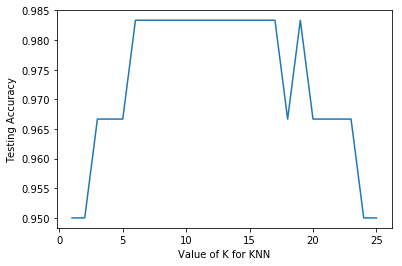

In [15]:
plot(k_range, scores)
xlabel('Value of K for KNN')
ylabel('Testing Accuracy')

###  Making predictions on out-of-sample data

In [16]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

# train the model with X and y (not X_train and y_train)
knn.fit(X, y)

# make a prediction for an out-of-sample observation
knn.predict([[3, 5, 4, 2]])

array([1])

### Resources

Quora: [What is an intuitive explanation of overfitting?](http://www.quora.com/What-is-an-intuitive-explanation-of-overfitting/answer/Jessica-Su)

Video: [Estimating prediction error](https://www.youtube.com/watch?v=_2ij6eaaSl0&t=2m34s) (12 minutes, starting at 2:34) by Hastie and Tibshirani